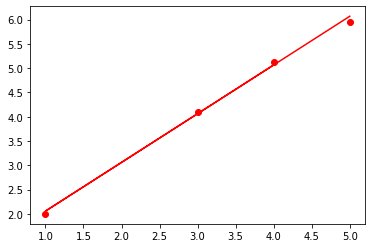

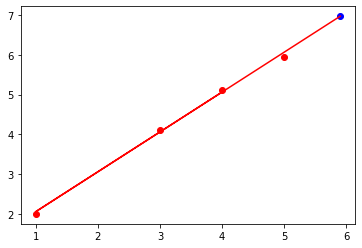

6.97036911084712

In [1]:
#linear regression for x and y pairs
# -> only 2D, every dim > 2 could be calculated with a perceptron
# perceptron learning is used as a learning technique here

from sklearn.utils.validation import check_random_state, check_X_y, check_array, check_is_fitted
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.multiclass import unique_labels 
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
class LinearRegressor():
    def __init__(self,X, y, weights = None, iterations = 50,random_state = None):
        self.random_state = random_state
        self.lr = 0.005
        self.errors = []
        self.iterations= iterations
        self.X = X
        self.y = y
        self.weights = weights
        if self.weights == None:
            self.random_state_ = check_random_state(self.random_state)
            self.weights = self.random_state_.random_sample(np.size(self.X,1))
    
    def fit(self):
        
        self.X,self.y = check_X_y(self.X,self.y)
        
        for i in range(self.iterations):
            rand_index = self.random_state_.randint(0, np.size(self.X,0))
            x_ = self.X[rand_index]
            y_ = self.y[rand_index]
            y_hat = np.dot(self.weights,x_)
            error = y_ - y_hat
            
            self.errors.append(error) 

            self.weights += error * x_ * self.lr

            #print(self.w)
              
        return self

    def predict(self, input):

        prediction = np.dot(self.weights,input)
        self.plot(input,prediction)

        return prediction

    def plot(self,input=None,prediction=None):
      
        #2 values: bias and input
        if np.size(self.X,1) == 2:
            x = []
        
        if prediction != None and input != None:
            x.append(input[1])
            plt.scatter(input[1],prediction,c='b')
            
        for i in range(np.size(self.X,0)):
            plt.scatter(self.X[i][1], self.y[i], c='r')

        bias = self.weights[0]
        w1 = self.weights[1]

        for element in self.X:
          x.append(element[1])


        x = np.array(x)

        y = w1*x + bias
        plt.plot(x,y,'r')

        plt.show()

X = np.array([[1,5],[1,1],[1,3],[1,4]])
y = np.array([5.95,2,4.1,5.12])
b = LinearRegressor(X = X, y = y,weights=None,random_state = 13, iterations=15000)
b.fit()
b.plot()
b.predict([1,5.9])